#Linear Regression in R

In [65]:
# %load_ext rmagic
# import rpy2 as Rpy

%reload_ext rpy2.ipython

   height weight
1      58    115
2      59    117
3      60    120
4      61    123
5      62    126
6      63    129
7      64    132
8      65    135
9      66    139
10     67    142
11     68    146
12     69    150
13     70    154
14     71    159
15     72    164
     height         weight     
 Min.   :58.0   Min.   :115.0  
 1st Qu.:61.5   1st Qu.:124.5  
 Median :65.0   Median :135.0  
 Mean   :65.0   Mean   :136.7  
 3rd Qu.:68.5   3rd Qu.:148.0  
 Max.   :72.0   Max.   :164.0  


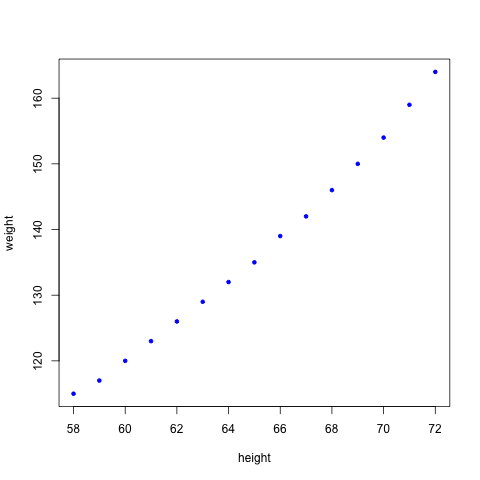

In [66]:
%%R

data(women)

print(women)

print(summary(women))

plot(women, pch=20, col="blue")   # plot the 'women' dataset


In [67]:
%%R

attach(women)  # attach namespace of 'women' in this session

print(weight)

print(height)

The following objects are masked from women (pos = 3):

    height, weight

 [1] 115 117 120 123 126 129 132 135 139 142 146 150 154 159 164
 [1] 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72


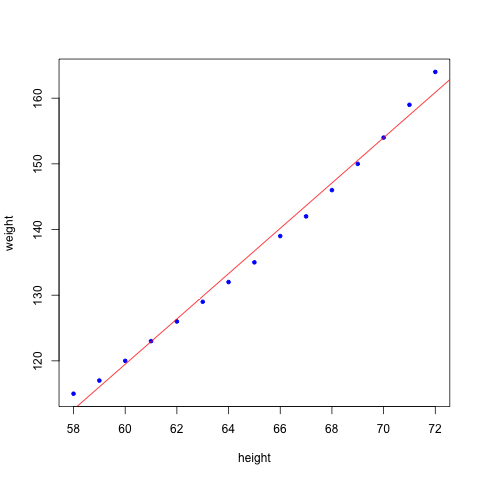

In [68]:
%%R

linear.model = lm( weight ~ height )  # linear model: weight vs height

plot(women, pch=20, col="blue")   # plot the 'women' dataset

abline(linear.model, col="red") # superimpose a red line (the fit)


In [69]:
%%R

print(summary(linear.model))


Call:
lm(formula = weight ~ height)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7333 -1.1333 -0.3833  0.7417  3.1167 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -87.51667    5.93694  -14.74 1.71e-09 ***
height        3.45000    0.09114   37.85 1.09e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.525 on 13 degrees of freedom
Multiple R-squared:  0.991,	Adjusted R-squared:  0.9903 
F-statistic:  1433 on 1 and 13 DF,  p-value: 1.091e-14



##Plot the linear model, and also one without an intercept


Call:
lm(formula = weight ~ height - 1)

Residuals:
   Min     1Q Median     3Q    Max 
-7.461 -5.235 -2.118  3.498 12.115 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
height  2.10951    0.02452   86.05   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.185 on 14 degrees of freedom
Multiple R-squared:  0.9981,	Adjusted R-squared:  0.998 
F-statistic:  7404 on 1 and 14 DF,  p-value: < 2.2e-16



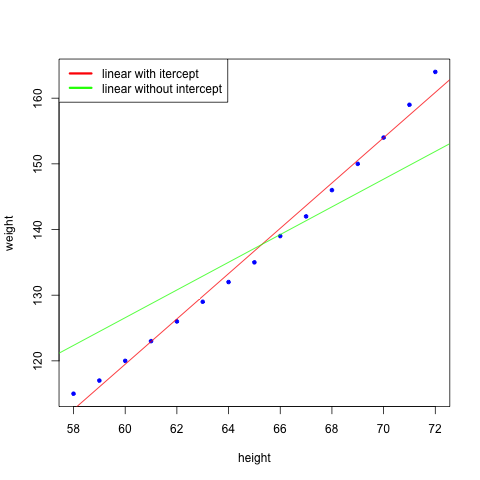

In [70]:
%%R

plot(women, pch=20, col="blue")
abline(linear.model, col="red")

model.without.intercept = lm( weight ~ height - 1 )

abline(model.without.intercept, col="green") # superimpose a green line
legend("topleft",
       c("linear with itercept", "linear without intercept"),     
       col=c("red", "green"), lwd=3)

summary(model.without.intercept)

##Add a quadratic model

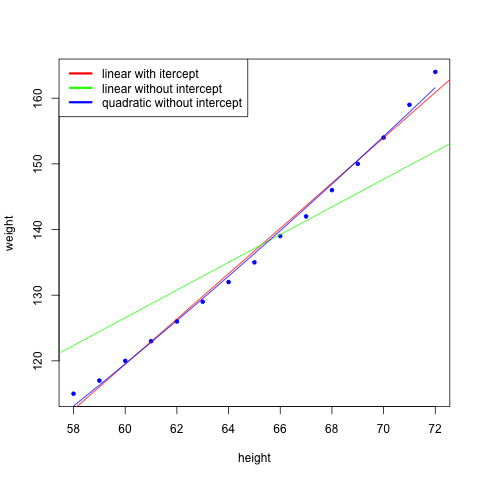

In [71]:
%%R

plot(women, pch=20, col="blue")
abline(linear.model, col="red")

model.without.intercept = lm( weight ~ height - 1 )
abline(model.without.intercept, col="green")

quadratic.model.without.intercept = lm( weight ~ height + I(height^2) - 1 )
summary(quadratic.model.without.intercept)

quadratic.predictions = predict( quadratic.model.without.intercept, data=women )
lines(height, quadratic.predictions, col="blue") # superimpose a blue line

legend("topleft",
       c("linear with itercept", "linear without intercept", "quadratic without intercept"),     
       col=c("red", "green", "blue"), lwd=3)


## Add a cubic model

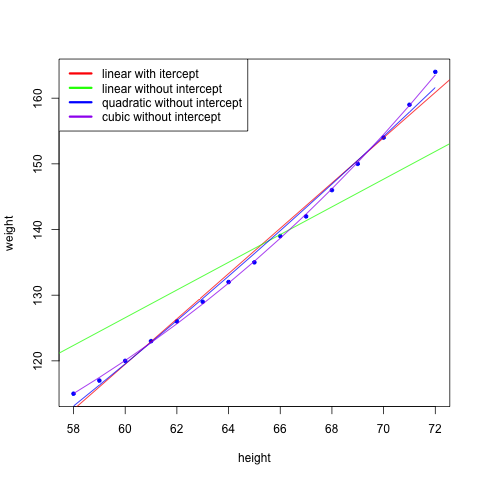

In [72]:
%%R

plot(women, pch=20, col="blue")
abline(linear.model, col="red")

model.without.intercept = lm( weight ~ height - 1 )
abline(model.without.intercept, col="green") # superimpose a green line

quadratic.model.without.intercept = lm( weight ~ height + I(height^2) - 1 )
quadratic.predictions = predict( quadratic.model.without.intercept, data=women)
lines(height, quadratic.predictions, col="blue") # superimpose a blue line
   
cubic.model.without.intercept = lm( weight ~ height + I(height^2)  + I(height^3) - 1 )
summary(cubic.model.without.intercept)

cubic.predictions = predict( cubic.model.without.intercept, data=women )
lines(height, cubic.predictions, col="purple") # superimpose a blue line

legend("topleft",
       c("linear with itercept", "linear without intercept", "quadratic without intercept", "cubic without intercept"),     
       col=c("red", "green", "blue", "purple"), lwd=3)

#Linear Models using Linear Algebra/Least Squares


betahat =
               [,1]
intercept -87.51667
height      3.45000


     y     yhat intercept height   residuals
1  115 112.5833         1     58 -2.41666667
2  117 116.0333         1     59 -0.96666667
3  120 119.4833         1     60 -0.51666667
4  123 122.9333         1     61 -0.06666667
5  126 126.3833         1     62  0.38333333
6  129 129.8333         1     63  0.83333333
7  132 133.2833         1     64  1.28333333
8  135 136.7333         1     65  1.73333333
9  139 140.1833         1     66  1.18333333
10 142 143.6333         1     67  1.63333333
11 146 147.0833         1     68  1.08333333
12 150 150.5333         1     69  0.53333333
13 154 153.9833         1     70 -0.01666667
14 159 157.4333         1     71 -1.56666667
15 164 160.8833         1     72 -3.11666667

RSS =
[1] 30.23333


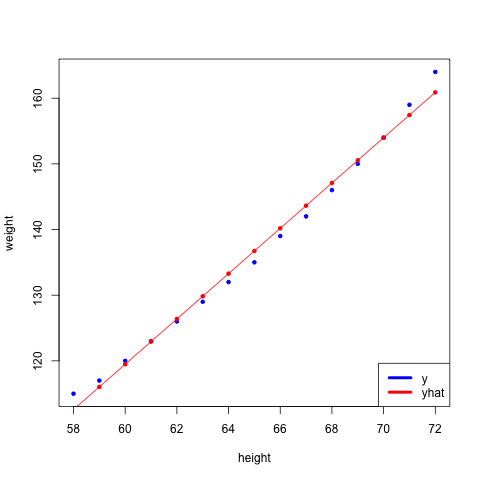

In [73]:
%%R

X = cbind( 1, as.matrix(women$height) )                    # (we assume the linear model has an intercept)
colnames(X) = c("intercept", "height")

y = as.matrix(women$weight)

betahat = solve( (t(X) %*% X), (t(X) %*% y) )

cat("\nbetahat =\n")
print(betahat)
cat("\n\n")

yhat = X %*% betahat

plot( women, pch=20, col="blue")
points( X[,2], yhat, pch=20, col="red" )
points( X[,2], yhat, type="l", col="red" )
legend("bottomright", legend=c("y", "yhat"), col=c("blue","red"), lwd=4 )

residuals = yhat - y

print(data.frame(y = y, yhat = yhat, X, residuals = residuals) )

RSS = sum(residuals^2)                                             # Residual Sum of Squares
cat("\nRSS =\n")
print(RSS)



betahat =
         [,1]
[1,] 2.109512


     y     yhat  X   residuals
1  115 122.3517 58   7.3517084
2  117 124.4612 59   7.4612206
3  120 126.5707 60   6.5707329
4  123 128.6802 61   5.6802451
5  126 130.7898 62   4.7897573
6  129 132.8993 63   3.8992695
7  132 135.0088 64   3.0087817
8  135 137.1183 65   2.1182939
9  139 139.2278 66   0.2278061
10 142 141.3373 67  -0.6626816
11 146 143.4468 68  -2.5531694
12 150 145.5563 69  -4.4436572
13 154 147.6659 70  -6.3341450
14 159 149.7754 71  -9.2246328
15 164 151.8849 72 -12.1151206

RSS =
[1] 535.5904


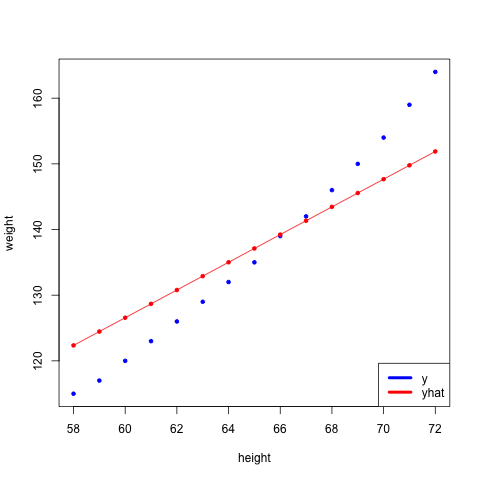

In [74]:

%%R

### X = cbind( 1, as.matrix(women$height) )
# (we assume the linear model has an intercept)
### having an intercept is a problem here

X = as.matrix(women$height)

y = as.matrix(women$weight)

betahat = solve( (t(X) %*% X), (t(X) %*% y) )
# now there is only one coefficient 

cat("\nbetahat =\n")
print(betahat)
cat("\n\n")

yhat = X %*% betahat

plot(women, pch=20, col="blue")
points( X, yhat, pch=20, col="red" )
points( X, yhat, type="l", col="red" )

legend("bottomright", legend=c("y", "yhat"), col=c("blue","red"), lwd=4 )

residuals = yhat - y

print(data.frame(y = y, yhat = yhat, X, residuals = residuals) )

RSS = sum(residuals^2)
# Residual Sum of Squares
cat("\nRSS =\n")
print(RSS)



betahat =
                     [,1]
height         0.73085415
height squared 0.02102516


     y     yhat height height.squared  residuals
1  115 113.1182     58           3364 -1.8818316
2  117 116.3090     59           3481 -0.6910341
3  120 119.5418     60           3600 -0.4581863
4  123 122.8167     61           3721 -0.1832882
5  126 126.1337     62           3844  0.1336602
6  129 129.4927     63           3969  0.4926590
7  132 132.8937     64           4096  0.8937081
8  135 136.3368     65           4225  1.3368075
9  139 139.8220     66           4356  0.8219572
10 142 143.3492     67           4489  1.3491572
11 146 146.9184     68           4624  0.9184075
12 150 150.5297     69           4761  0.5297081
13 154 154.1831     70           4900  0.1830591
14 159 157.8785     71           5041 -1.1215396
15 164 161.6159     72           5184 -2.3840881

RSS =
[1] 17.70383


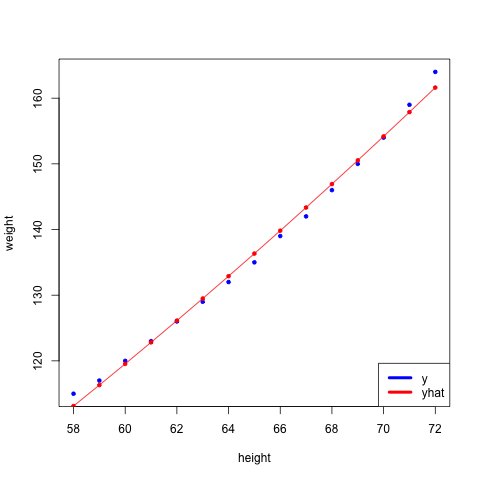

In [75]:
%%R

# add a quadratic term (height^2) to the dataset

X = cbind( as.matrix(women$height), as.matrix(women$height ^ 2) )

colnames(X) = c("height", "height squared")

y = as.matrix(women$weight)

betahat = solve( (t(X) %*% X), (t(X) %*% y) )
# now there is only one coefficient 

cat("\nbetahat =\n")
print(betahat)
cat("\n\n")

yhat = X %*% betahat

plot(women, pch=20, col="blue")
points( X[,1], yhat, pch=20, col="red" )
points( X[,1], yhat, type="l", col="red" )
legend("bottomright", legend=c("y", "yhat"), col=c("blue","red"), lwd=4 )

residuals = yhat - y

print(data.frame(y = y, yhat = yhat, X, residuals = residuals) )

RSS = sum(residuals^2)                                             # Residual Sum of Squares
cat("\nRSS =\n")
print(RSS)


In [76]:
%%R

n = nrow(X)
p = ncol(X)
print(data.frame(n=n, p=p))

se_residuals = sqrt(RSS / (n-p)) 
# standard error of the residuals

dotprod = function(u,v) (t(u) %*% v)

Rsquared = dotprod(y,yhat)^2 /  (dotprod(y,y) * dotprod(yhat,yhat))
Rsquared

equivalentRsquared = dotprod(yhat,yhat) / dotprod(y,y)
equivalentRsquared

print(data.frame( se_residuals = se_residuals, Rsquared = Rsquared, equivalentRsquared = equivalentRsquared ))


   n p
1 15 2
  se_residuals  Rsquared equivalentRsquared
1     1.166976 0.9999376          0.9999376



Call:
lm(formula = weight ~ height + I(height^2) - 1, data = women)

Coefficients:
     height  I(height^2)  
    0.73085      0.02103  



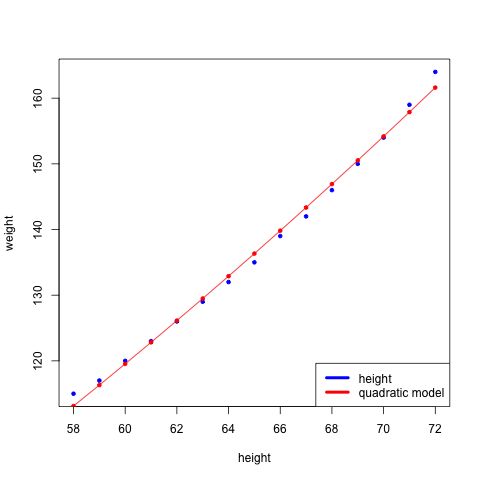

In [77]:
%%R

data(women)

wh.model = lm( weight ~ height + I(height^2) -1,  women )  # a model of "height" vs. "weight"
                                                           # (we assume the linear model has an intercept)
plot(women, pch=20, col="blue")                            # plot the points in the dataset

points( women$height, predict(wh.model, data=women), col="red", type="l" )  # superimpose a line
points( women$height, predict(wh.model, data=women), col="red", pch=20 )    # superimpose points
legend("bottomright", legend=c("height", "quadratic model"), col=c("blue","red"), lwd=4 )

print(wh.model)

In [78]:
%%R

# summarize the linear model in more detail

print(summary(wh.model))


Call:
lm(formula = weight ~ height + I(height^2) - 1, data = women)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3492 -0.8578 -0.1831  0.5746  2.3841 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
height      0.730854   0.070848   10.32 1.25e-07 ***
I(height^2) 0.021025   0.001078   19.50 5.22e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.167 on 13 degrees of freedom
Multiple R-squared:  0.9999,	Adjusted R-squared:  0.9999 
F-statistic: 1.042e+05 on 2 and 13 DF,  p-value: < 2.2e-16



In [79]:
%%R

# display all of the 'linear model' object structure

str(wh.model)

List of 12
 $ coefficients : Named num [1:2] 0.731 0.021
  ..- attr(*, "names")= chr [1:2] "height" "I(height^2)"
 $ residuals    : Named num [1:15] 1.882 0.691 0.458 0.183 -0.134 ...
  ..- attr(*, "names")= chr [1:15] "1" "2" "3" "4" ...
 $ effects      : Named num [1:15] -532.2287 22.7571 0.0344 -0.2329 -0.5418 ...
  ..- attr(*, "names")= chr [1:15] "height" "I(height^2)" "" "" ...
 $ rank         : int 2
 $ fitted.values: Named num [1:15] 113 116 120 123 126 ...
  ..- attr(*, "names")= chr [1:15] "1" "2" "3" "4" ...
 $ assign       : int [1:2] 1 2
 $ qr           :List of 5
  ..$ qr   : num [1:15, 1:2] -252.299 0.234 0.238 0.242 0.246 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:15] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:2] "height" "I(height^2)"
  .. ..- attr(*, "assign")= int [1:2] 1 2
  ..$ qraux: num [1:2] 1.23 1.28
  ..$ pivot: int [1:2] 1 2
  ..$ tol  : num 1e-07
  ..$ rank : int 2
  ..- attr(*, "class")= chr "qr"
 $ df.residual  : int 13
 $ xlevels      :

In [80]:
%%R

#
#  adapted from the lm.summary function in http://svn.r-project.org/R/trunk/src/library/stats/R/lm.R
#

sigmahat    = sqrt( RSS / (n-p) )                          #  standard error of the residuals (a single value)
var_betahat = solve( (t(X) %*% X) ) * sigmahat^2           #  variance of betahat  (vector of length p)
se_betahat  = sqrt( diag(var_betahat) )                    #  standard error of betahat  (vector of length p)
tStatistic = betahat / se_betahat                          #  t-statistic:  coefficient divided by its standard error  (vector of length p)

tStatisticPvalue = 2 * pt(abs(tStatistic), df=(n-p), lower.tail=FALSE)       #  Pr of a larger t-statistic value  (vector of length p)

print(data.frame( sigmahat = sigmahat, var_betahat = var_betahat, se_betahat = se_betahat,
                 tStatistic = tStatistic, tStatisticPvalue = tStatisticPvalue ))
cat("\n\n")

MSS = if (attr(wh.model$terms, "intercept")) sum((yhat - mean(yhat))^2) else sum(yhat^2)
MSS

df  = if (attr(wh.model$terms, "intercept")) 1L else 0L
df

multipleRsquared = MSS / (MSS + RSS)
multipleRsquared

adjustedRsquared = 1 - (1 - multipleRsquared) * ( n / (n-p) )
adjustedRsquared

fStatistic = (MSS / (p-df)) / ( RSS / (n-p) )
fStatistic

fStatisticPvalue = pf( fStatistic, (p-df), (n-p), lower.tail = FALSE )
fStatisticPvalue

print(data.frame( MSS = MSS, df = df, multipleRsquared = multipleRsquared,
                 fStatistic = fStatistic, fStatisticPvalue = fStatisticPvalue ))
cat("\n\n")
    
colNames = colnames(X)

if (is.null(colNames)) colNames = paste("V", 1:p, sep="")
if (attr(wh.model$terms, "intercept")) colNames[1] = '(Intercept)'

cat("                        Estimate  Std. Error  t value  Pr[>|t|]\n")
for (i in 1:p) {
   cat(sprintf("%20s %12.6f %10.6f %7.2f %9.1e\n",
       colNames[i], betahat[i], se_betahat[i], tStatistic[i], tStatisticPvalue[i]))
}
digits = 3
cat("\nResidual standard error:", round(se_residuals, digits), "on", (n-p), "degrees of freedom\n")
cat("Multiple R-squared:", round(multipleRsquared, digits),
 ",\tAdjusted R-squared:",round(adjustedRsquared,digits), "\n" )
cat("F-statistic:", round(fStatistic, digits), "on", (p-df), "and", (n-p),
    "DF,  p-value:", sprintf("%9.1e",fStatisticPvalue), "\n")


               sigmahat var_betahat.height var_betahat.height.squared
height         1.166976       5.019466e-03              -7.622285e-05
height squared 1.166976      -7.622285e-05               1.162433e-06
                se_betahat tStatistic tStatisticPvalue
height         0.070848188   10.31578     1.252906e-07
height squared 0.001078162   19.50093     5.223524e-11


       MSS df multipleRsquared fStatistic fStatisticPvalue
1 283785.3  0        0.9999376   104192.4     4.654008e-28


                        Estimate  Std. Error  t value  Pr[>|t|]
              height     0.730854   0.070848   10.32   1.3e-07
      height squared     0.021025   0.001078   19.50   5.2e-11

Residual standard error: 1.167 on 13 degrees of freedom
Multiple R-squared: 1 ,	Adjusted R-squared: 1 
F-statistic: 104192.4 on 2 and 13 DF,  p-value:   4.7e-28 


              [,1]          [,2]          [,3]          [,4]
[1,]  1.000000e+00  5.040929e-16 -6.636340e-16 -2.779829e-16
[2,]  5.040929e-16  1.000000e+00 -9.147046e-16 -5.271798e-16
[3,] -6.636340e-16 -9.147046e-16  1.000000e+00  4.528189e-16
[4,] -2.779829e-16 -5.271798e-16  4.528189e-16  1.000000e+00


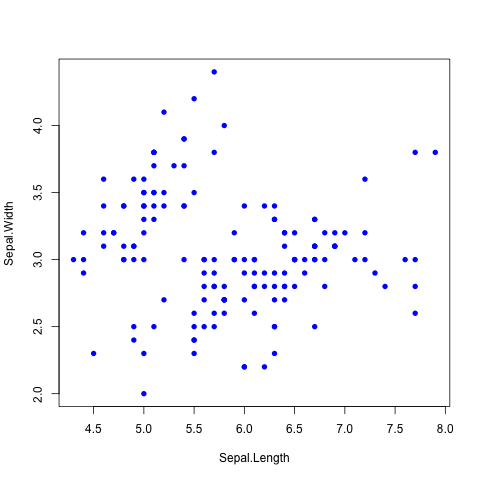

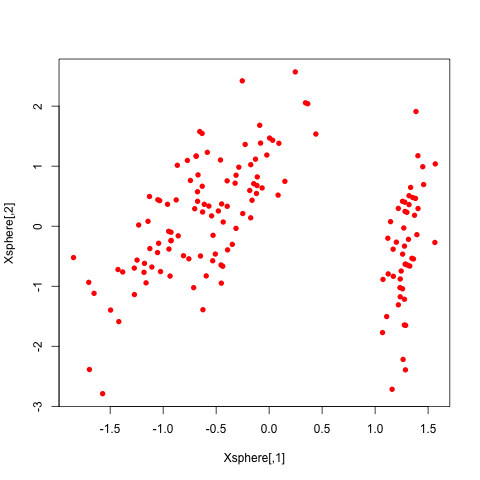

In [82]:
%%R

# "sphering" the data
#    unrotating and unscaling the data using its covariance SVD
#    --- changing rotated "cigars" into "spheres".

sphere = function(Data) {
   X = data.matrix(Data)
   Xbar = matrix(1, nrow(X), 1) %*% apply(X,2,mean)
   Xsvd = svd(cov(X))
   U = Xsvd$u
   D = diag( (Xsvd$d)^(-1/2) )
   Xsphere = (X-Xbar) %*% U %*% D
   plot( X, col="blue", pch=16)
   plot( Xsphere, col="red", pch=16 )
   print(cov(Xsphere))
}

sphere(iris[,1:4])

